![ICL](Images/imperiallogo.jpeg)

# Mathematics and Statistics

https://bitbucket.org/mfumagal/statistical_inference

## Probability theory

Probability theory is the foundation for all statistical inferences. Through the use of models of experiments, we are able to make inferences about populations based on examining only a part of the whole.

Here we are going to outline the basic ideas of probability theory that are of direct importance for statistical inferences. As statistics builds upon probability theory, the latter builds upon the set theory.

### Intended Learning Outcomes 

By the end of this session, you will be able to:
* Describe the principles of set theory and set operations
* Illustrate the axiomatic foundations of probability theory and appropriate counting methods
* Identify dependence and indepedence of events
* Show the utility of distribution functions for random variables
* Demonstrate how to implement basic probability calculus in _*R*_

## Set theory

If one of our main objectives in statistics is to draw conclusions about a population of objects after an experiment, then it is essential to identify the possible outcomes of it.

> The set $S$ of all possible outcomes of a particular experiment is called the _sample space_ for the experiment.

If the experiment consists of tossing a coin, then the sample space contains only two outcomes, heads and tails, and therefore: $S=\{H,T\}$.

If, on the other hand, the experiment consists of observing the new GCSE scores of randomly selected pupils, the sample space would be the set of integers between 0 and 9, that is $S=\{0,1,2,...,8,9\}$.

Finally, consider an experiment where the observation is the reaction time to a stimulus. In this case, the sample space consist of all positive numbers, that is $S=(0,\infty)$.


Imagine that our experiment consists on observing the nucleotidic sequence of a particular gene of interest. 

What is the sample space? 

$S_G=\{A,C,G,T\}$

In [ ]:
S <- c("A", "C", "G", "T")
S

In [ ]:
sample(x=S, size=1)

Now suppose that we are interested in making inferences on the amino acidic sequence of a protein. 

What is the sample space?

$S_P=?$

Finally, let's suppose that our observations consist in divergence between orthologous genes of arbitrary length. 
In other words, for a large set of genes we calculate the relative difference in nucleotidic content between genes in different species. 

What is the sample space for such divergence?

$S_D=?$

In [ ]:
S <- seq(0,1,0.001)

hist(S)

From these examples, we evince that we can classify sample spaces into two types according to the number of elements they can contain.
Sample spaces can be either _countable_ or _uncountable_.
If the sample space is finite or each element can be put into a 1-1 correspondence with a subset of integeres, the sample space is countable.
Therefore, the toss coin and GCSE scores are countable whereas the reaction time consists of an uncountable sample space.

The distinction between countable and uncountable sample spaces, despite sometimes trivial, is of great importance as it dictates the way with probabilities can be assigned.
In practice, probabilistic methods associated to uncountable sample sizes are less cumbersome and can provide an approximation to the true countable situation.

Once the sample space has been defined (e.g. countable?), we can consider collections of possible outcomes of an experiment.
> An _event_ is any collection of possible outcomes of an experiment, that is, any subset of $S$, including $S$ itself.

In [ ]:
# an event A of set S
S <- c("A", "C", "G", "T")
S

A <- S[1:2] 
A

A %in% S

In [ ]:
# an event A of set S
S <- seq(0,1,0.001)

A <- S[S<0.05]

prod(A %in% S) 

Let $A$ ben an event, a subset of $S$. We say that the event $A$ occurs if the outcome of the experiment is in the set $A$.

\begin{equation}
A \subset B \iff x \in A \implies x \in B
\end{equation}
\begin{equation}
A = B \iff A \subset B \text{ and } B \subset A
\end{equation}

### Set operations

Consider an experiment of drawing a nucleotide at random. The sample space is $S=\{A,C,G,T\}$ and some possible events are $A=\{G,C,A\}$ and $B=\{T,G\}$. What is the union of $A$ and $B$? 

Given any two events $A$ and $B$, set operations include:
* Union: the union of $A$ and $B$ is the set of elements that belong to either $A$ or $B$ or both:
\begin{equation}
A \cup B = \{x: x \in A \text{ or } x \in B\}
\end{equation}

In [ ]:
# define the sample space
S <- c("A","C","G","T")
# define A and B
A <- c("G","C","A")
B <- c("T","G") 

# union
union(A,B)

What is the intersection between $A$ and $B$?

* Intersection: the intersection of $A$ and $B$ is the set of elements that belong to both $A$ and $B$:
\begin{equation}
A \cap B = \{x: x \in A \text{ and } x \in B\}
\end{equation}

In [ ]:
# define the sample space
S <- c("A","C","G","T")
# define A and B
A <- c("G","C","A")
B <- c("T","G")

# intersection
intersect(A,B)

What is the complement of $A$? 

* Complementation: the complement of $A$ is the set of all elements that are not in $A$:
\begin{equation}
A^c = \{x:x \notin A\}
\end{equation}

In [ ]:
# define the sample space
S <- c("A","C","G","T")
# define A and B
A <- c("G","C","A")
B <- c("T","G")

# complement of A
setdiff(S,A)

 What is the complement of the union of $A$ and $B$?

Using Venn diagrams is another useful way to visualise (but not prove) set operations.
For very large sets it is convenient to write programs that will do the calculations. As an illustration, let's solve the task above using R. There are several functions in R suitable for set operations, as outlined [here](https://stat.ethz.ch/R-manual/R-devel/library/base/html/sets.html). 

In [ ]:
# define the sample space
S <- c("A","C","G","T")
# define A and B
A <- c("G","C","A")
B <- c("T","G")

In [ ]:
# complement of A U B
print(setdiff(S,union(A,B)))

From this example, we also found a special set, the empty set $\emptyset$.

It is also worth noting that the elementary set operations can be combined. We can now state several useful properties of set operations.

### Properties of set operations

* Commutativity
\begin{equation}
A \cup B = B \cup A \\
A \cap B = B \cap A
\end{equation}

* Associativity
\begin{equation}
A \cup (B \cup C) = (A \cup B) \cup C \\
A \cap (B \cap C) = (A \cap B) \cap C
\end{equation}

* Distributive laws
\begin{equation}
A \cap (B \cup C) = (A \cap B) \cup (A \cap C) \\
A \cup (B \cap C) = (A \cup B) \cap (A \cup C)
\end{equation}

* DeMorgan's laws
\begin{equation}
(A \cup B)^c = A^c \cap B^c \\
(A \cap B)^c = A^c \cup B^c
\end{equation}

Assuming that we have a third set $C=\{C,T\}$ of nucleotides. Use _R_ to show that the above properties hold.

In [ ]:
S <- c("A","C","G","T")
# define A and B
A <- c("G","C","A")
B <- c("T","G")
# define C  
C = c("C","T")

In [ ]:
# commutativity
setequal(union(A,B), union(B,A))

#...

The operations of union and intersection can be extended to infinite collections of sets.
As an example, let $S=(0,1]$ and define $A_i = [(1/i),1]$.
Then $\bigcup_{i=1}^\infty A_i = ?$ and $\bigcap_{i=1}^\infty A_i = ?$.

### Partition

> Two events $A$ and $B$ are _disjoint_ (or _mutually exclusive_ ) if $A \cap B = \emptyset$. The events $A_1,A_2,...$ are _pairwise disjoint_ if $A_i \cap A_j = \emptyset$ for all $i \neq j$.

Disjoint sets are sets with no points in common. For instance the collection $A_i = [i, i+1)$ with $i=0,1,2,...$ consists of pairwise disjoint sets.

> If $A_1, A_2, ...$ are pairwise disjoint and $\bigcup_{i=0}^\infty A_i = S$, then the collection $A_1, A_2, ...$ forms a _partition_ of S.

In [3]:
# define the sample space
S <- c("A","C","G","T")
# define A and B
A <- c("C","A")
B <- c("T","G")

# A and B form a partition of S since:
print(intersect(A,B))

sort(union(A,B)) == S
prod(sort(union(A,B)) == S)

character(0)


[1] TRUE TRUE TRUE TRUE

[1] 1

The realisation of an experiment is an outcome in the sample space. If the experiment is performed many times, different outcomes may occur each time or some outcomes may repeat (if the sample space is countable).
It is immediate to think of such frequency of occurence as a probability.
However, here we will think of probabilities using a mathematical axiomatic approach, in the sense that probabilities are defined by a function satisfying such axioms.

### Axiomatic foundations

For each event $A$ in the sample space $S$ we associate a number between 0 and 1 that we call the probability of A, denoted as $P(A)$. Intuitively, for each $A \subset S$ we define $P(A)$ as the probability that $A$ occurs. 

> A collection of subsets of $S$ is called a _sigma algebra_ (or Borel field), denoted by $\mathcal{B}$, if it satisfies the following properties:
1. $\emptyset \in \mathcal{B}$
2. if $A \in \mathcal{B}$, then $A^c \in \mathcal{B}$ 
3. if $A_1, A_2, ... \in \mathcal{B}$, then $\bigcup_{i=1}^\infty A_i \in \mathcal{B}$

We can have many different sigma algebras associated with sample space $S$.

Is the collection of sets $\{\emptyset, S\}$ a sigma algebra with $S$? If so, Why?

If $S$ is finite or countable, then $\mathcal{B}$ contains all subsets of $S$ including $S$ itself.

If $S$ has $n$ elements, there are $2^n$ sets in $\mathcal{B}$. 

What is $\mathcal{B}$ if $S=\{1,2,3\}$?

### Probability function

> Given a sample space $S$ and an associated sigma algebra $\mathcal{B}$, a _probability function_ is a function $P$ with domain $\mathcal{B}$ that satisfies:
1. $P(A) \geq 0$ for all $A \in \mathcal{B}$
2. $P(S)=1$
3. If $A_1, A_2, ... \in \mathcal{B}$ are pairwise disjoint, then $P(\bigcup_{i=1}^\infty A_i)=\sum_{i=1}^\infty P(A_i)$

Any function $P$ that satisfies these Axioms of Probability is called a probability function.

Consider the experiment of randomly drawing one nucleotide from a genome and record whether it's a purine ($U$) or pyrimidine ($Y$), thus $S=\{U,Y\}$. Let's also assume that $P(\{U\})=P(\{Y\})$. 

What are possible values for $P(\{U\})$ and $P(\{Y\})$ in order for them to define a legitimate probability function?

In [ ]:
S <- c("U","Y")
#P_U <- ?
#P_Y <- ?

In [ ]:
P_U <- 0.5
P_Y <- 0.5

# 1.
(P_U>=0) & (P_Y>=0)

# 2. & 3.
(P_U+P_Y) == 1


There is a much more common method for defining a legitimate probability function.

Let $S=\{s_1, s_2, ..., s_n\}$ be a finite and/or countable set. Let $\mathcal{B}$ be any sigma algebra of subsets of $S$. Let $p_1, p_2, ..., p_n$ be nonnegative numbers that sum to 1. 

For any $A \in \mathcal{B}$, define $P(A)$ by
\begin{equation}
P(A) = \sum_{\{i:s_i \in A\}} p_i
\end{equation}
Then $P$ is a probability function on $\mathcal{B}$.

### Calculus

From the Axioms of Probabilities we can derive several properties of the probability function.

If $P$ is a probability function and $A$ is any set in $\mathcal{B}$, then
1. $P(\emptyset)=0$
2. $P(A) \leq 1$
3. $P(A^c) = 1 - P(A)$

We can easily prove the last one. $A$ and $A^c$ form a partition of the sample space, that is, $S=A \cup A^c$. Therefore, $P(A \cup A^c) = P(S) = 1$. Since $A$ and $A^c$ are disjoint, $P(A \cup A^c) = P(A) + P(A^c)$. By combining the last two equations we retrieve $P(A^c) = 1 - P(A)$. 

If $P$ is a probability function and $A$ and $B$ are any sets in $\mathcal{B}$, then
1. $P(B \cap A^c) = P(B) - P(A \cap B)$
2. $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
3. if $A \subset B$, then $P(A) \leq P(B)$

These properties can be easily visualised with Venn diagrams. In particular, the second one gives a useful inequality for the probability of an intersection. 

Since $P(A \cup B) \leq 1$, then
\begin{equation}
P(A \cap B) \geq P(A) + P(B) - 1
\end{equation}

This is a special case of the _Bonferroni's Inequality_ used to bound of the probability of a simultaneous event from the probabilities of the individual events. 

This is useful when it is difficult to calculate the intersection probability but we want to get some ideas of this probability.

This inequality can be derived by observing the following:
* $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
* $A \cup B = A \cup {B \cap A^c}$
* $A$ and  ${B \cap A^c}$ are disjoint
* $P(A \cup B) = P(A) + P(B \cap A^c) = P(A) + P(B) - P(A \cap B)$ since $P(B \cap A^c) = P(B) - P(A \cap B)$

After some rearrangements we have the _Bonferroni's Inequality_.

If $P$ is a probability function, then
1. $P(A) = \sum_{i=1}^\infty P(A \cap C_i)$ for any partition $C_1, C_2, ...$ of $S$
2. $P(\bigcup_{i=1}^\infty A_i) \leq \sum_{i=1}^\infty P(A_i) $ for any sets $A_1, A_2, ...$ 

The last property is called _Boole's Inequality_ which is a general version of the Bonferroni's Inequality.


### Counting

Methods of counting are used to construct probability assignments on finite sample spaces. Counting is often difficult and the trick is to break it down to simpler tasks that are easy to count. 



The Fundamental Theorem of Counting states that if a job consists of $k$ separate tasks, the $i-th$ of which can be done in $n_i$ ways, $i=1,...,k$, then the entire job can be done in $n_1 \times n_2 \times ... \times n_k$ ways.

Let's assume that one protein domain is comprised of 6 amino acids. To be able to calculate the probability of having exactly one sequence we first must count how many different combinations of 6 amino acids can be observed.

Is that enough information to calculate such probabilities? What else is it needed?

We need to specify whether the same amino acid can be present more than once. This distinction is between counting _with replacement_ and counting _without replacement_.

Furthermore, we may want to interested in the exact order of the amino acids or simply the presence of certain ones. This distinction is between counting _ordered_ objects or counting _unordered_ ones.


|  \  |   Without replacement   |   With replacement     |
| --- | --- | --- |
| Ordered |  ?  |  ?   |
| Unordered |  ?   |  ?  |



#### Ordered, without replacement

The first amino acid can be selected in 20 ways, the second in 19 ways, etc. 

So there are $20 \times 19 \times 18 \times 17 \times 16 \times 15 = \frac{20!}{14!}$ ways.

> For a positive integer $n$, $n!$ (read $n$ factorial) is the product of all the positive integers less than or equal to $n$, that is, $n! =  n \times (n-1) \times (n-2) \times ... \times 2 \times 1$. We define $0!=1$.

In [ ]:
factorial(20)/factorial(14) 

#### Ordered, with replacement

All amino acids can be selected in 20 ways if they are replaced.

Therefore, there are $20\times20\times20\times20\times20\times20$ ways.

In [ ]:
20^6

#### Unordered, without replacement

Since we know the number of ways when the ordering must be taken into account, $\frac{20!}{14!}$, we need to divide this number by all the possible ways that 6 amino acid can be ordered.
The latter is equal to $6!$. 

Therefore, the unordered counting of 6 amino acids without replacement is $\frac{20!}{6!14!}$.

In [ ]:
factorial(20)/(factorial(6)*factorial(14))

> For nonnegative integers $n$ and $r$, where $n \geq r$, we define the symbol ${n \choose r}$, read $n \text{ choose } r$, as
\begin{equation}
{n \choose r} = \frac{n!}{r!(n-r)!}
\end{equation}

These numbers are also called _binomial coefficients_.

#### Unordered, with replacement

Imagine to assign 6 amino acids on the 20 possible values. We can reduce the ways of counting noting that we just need to keep track of the arrangement and that the two boundaries of the 22 interval bounds (since we have 20 bins) are not relevant. Therefore, we have $\frac{25!}{6!19!}$ ways.

In [ ]:
factorial(25)/(factorial(6)*factorial(19))

We can generalise all these derivations and summarise them in the following table.


| \  | Without replacement | With replacement |
|---|---|---|
| Ordered |  ? | $n^k$  |
| Unordered | ?  | ?  |

### Enumerating outcomes

These counting methods are useful when the sample size $S$ is a finite set and all the outcomes are equally likely. In fact, probabilities of events can be simply calculated by counting the number of outcomes in the event.

Suppose that $S=\{s_1,...,s_n\}$ is a finite sample space. If all the outcomes are equally likely, then $P(\{s_i\})=1/N$ for every outcome $s_i$.
\begin{equation}
P(A) = \sum_{s_i \in A} P(\{s_i\}) = \sum_{s_i \in A} \frac{1}{N} = \frac{\text{# elements in } A}{\text{# elements in } S}
\end{equation}

## Conditional probability

So far all probabilities have been unconditional. All probabilities were calculated with respect to that sample space. Often we want to update the sample space based on new information. In these cases, we need to calculate _conditional probabilities_.

> If $A$ and $B$ are events in $S$, and $P(B)>0$, then the _conditional probability of A given B_ , written $P(A|B)$, is
\begin{equation}
P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{equation}

The original sample space $S$ has been updated to $B$, so that $P(B|B)=1$.

If $A$ and $B$ are disjoints, then $P(A \cap B)=0$ and therefore $P(A|B)=P(B|A)=0$.

Two events, $A$ and $B$, are statistically independent if
\begin{equation}
P(A \cap B) = P(A)P(B)
\end{equation}

If the occurrence of $B$ has no effect on the probability of $A$, then $P(A|B)=P(A)$.

If $A$ and $B$ are independent events, then the following pairs are also independent:
* $A$ and $B^c$
* $A^c$ and $B$
* $A^c$ and $B^c$

> A collection of events $A_1, A_2, ..., A_n$ are _mutually independent_ if for any subcollection $A_{i_1},...,A_{i_k}$, we have
\begin{equation}
P(\bigcap_{j=1}^k A_{i_j} ) = \prod_{j=1}^k P(A_{i_j})
\end{equation}

Simultaneous independence requires a strong definition.

##  Random variables

Often it is easier to work with a summary variable than with the full original structure.

Assume we are interested in the GC content of a nucleotidic sequence $\{A,C,G,T\}$ of 50 base pairs.

If we record "1" for a GC base and "0" otherwise (A or T), the sample space for this experiment has $2^{50}$ elements, each one comprising an ordered string of 1s and 0s of length 50.

We should reduce this size by agreeing that the quantity of interest is the number of bases that are GC out of 50.

If we define $X$ = number of 1s recorded out of 50, we have captured this requirement.

Now the sample space for $X$ is the set of integers $\{0,1,2,...,50\}$ and it is much easier to deal with than the original sample space.

When we define $X$, we create a mapping (a function) from the original sample space to a new sample space.
> A _random variable_ is a function from a sample space $S$ into the real numbers.

In defining a random variable, we also defined a new sample space. Can the probability function on the original sample space be used for the random variable?

Suppose we have a sample space $S=\{s_1,...,s_n\}$ with a probability function $P$ and we define a random variable $X$ with range $\mathcal{X}=\{x_1,...,x_m\}$.

We can define a probability function $P_X$ on $\mathcal{X}$ with the following procedure: we observe $X=x_i$ if and only if the outcome of the experiment is an $s_j \in S$ such that $X(s_j)=x_i$.

\begin{equation*}
    P_X(X=x_i) =  P(\{s_j \in S : X(s_j)=x_i\} )
\end{equation*}
where $P_X$ is an _induced_ probability function on $\mathcal{X}$.

If $\mathcal{X}$ is uncountable, then
\begin{equation*}
    P_X(X \in A) =  P(\{s \in S : X(s) \in A\} )
\end{equation*}

## Distribution functions

With every random variable $X$, we associate a function called the cumulative distribution function of $X$.
> The _cumulative distribution function_ or _cdf_ of a random variable $X$, denoted by $F_X(x)$ is defined by
\begin{equation*}
F_X(x) = P_X(X \leq x) \text{, for all } x
\end{equation*}

Consider the experiment of sampling three nucleotidic bases and let $X$ be the number of GC bases observed.
What is the cdf of $X$? Can we plot it?

\begin{align*}
F_X(x) &= 0 \text{, if } -\infty < x < 0 \\
F_X(x) &= ? \text{, if } \\
...
\end{align*}

Note tha the step function $F_X(x)$ is defined for all values of $x$, not just those is $\mathcal{X}$.
Also note that $F_X(x)$ has jumps at values of $x_i \in \mathcal{X}$ and the size of the jump at $x_i$ is equal to $P(X=x_i)$.

$F_X(x)$ can be discontinuous but has the property of right-continuity.

The function $F_X(x)$ is a cdf if and only if the following three conditions hold:
1. $\lim_{x \rightarrow -\infty} F_X(x)=0$ and $\lim_{x \rightarrow \infty} F_X(x)=1$.
2. $F_X(x)$ is a nondecreasing function of $x$.
3. $F_X(x)$ is right-continuous.

Whether a cdf is continuous or not corresponds to the associated random variable being continuous or not.

> A random variable $X$ is _continuous_ if $F_X(x)$ is a continuous function of $x$. A random variable $X$ is _discrete_ if $F_X(x)$ is a step function of $x$.

> The random variables $X$ and $Y$ are _identically distributed_ if, for every set $A \in \mathcal{B}^1$ (the smallest algebra sigma), $P(X \in A) = P(Y \in A)$.

If $X$ and $Y$ are identically distributed, $F_X(x)=F_Y(x)$ for every $X$.

$F_X(x)$ completely determines the probability distribution of a random variable $X$.

Consider the experiment of sampling nucleotidic bases and let $X$ be the number of GC bases observed and $Y$ the number of AT bases observed. 

Are $X$ and $Y$ identically distributed?

## Density and mass functions

Apart from its cdf $F_X$, another function is associated with a random variable $X$.
This function is called either the probability density function (pdf) or probability mass function (pmf).

> The _probability mass function (pmf)_ of a discrete random variable $X$ is given by
\begin{equation*}
f_X(x) = P(X=x) \text{ for all } x
\end{equation*}

Recall that $f_X(x)$ is the size of the jump in the cdf at $x$. 


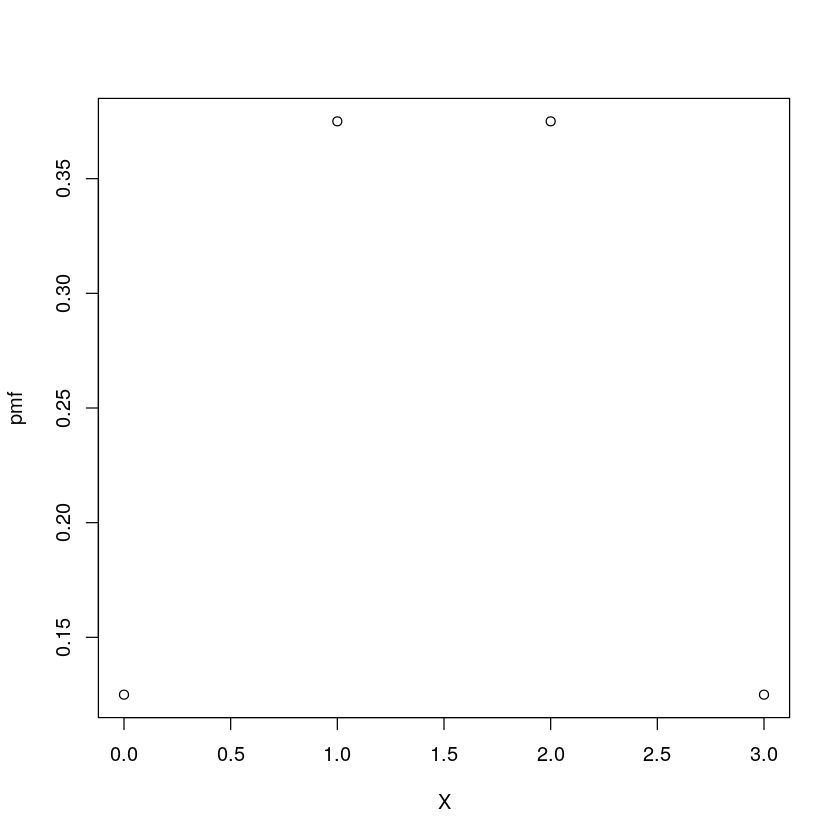

In [1]:
pmf <- c(1/8,3/8,3/8,1/8)
plot(x=c(0,1,2,3), pmf, xlab="X")

From the pmf, we can calculate probabilities of events, as 
\begin{equation*}
P(a \leq X \leq b) = \sum_{k=a}^b f_X(k)
\end{equation*}
for positive integers $a$ and $b$, with $a \leq b$.

What happens in the continuous case?

> The _probability density function_ or _pdf_ , $f_X(x)$, of a continuous random variable $X$ is the function that satisfies
\begin{equation*}
F_X(x) = \int_{-\infty}^{x} f_X(t) dt \text{ for all } x
\end{equation*}

The expression "$X$ has a distribution given by $F_X(x)$" can be written as "$X \sim F_X(x)$". We can also write $X \sim f_X(x)$ or $X \sim Y$ if $X$ and $Y$ have the same distribution.
The pdf (or pmf) contains the same information as the cdf. We can use either one to solve problems.

We need to be more careful in the continuous case. In the discrete we can sum over values of the pmf to get the cdf. Similarly, in the continuous case we substitute sum with integrals.
\begin{equation*}
P(X \leq x) = F_X(x) = \int_{-\infty}^x f_x(t) dt
\end{equation*}
If $f_X(x)$ is continuous, then
\begin{equation*}
\frac{d}{dx} F_X(x) = f_X(x)
\end{equation*}

Assuming that the cdf is
\begin{equation*}
F_X(x) = \frac{1}{1+e^{-x}}
\end{equation*}
What is the pdf?

$f_X(x) = \frac{e^{-x}}{(1+e^{-x})^2}$

A function $f_X(x)$ is a pdf (or pmf) of a random variable $X$ if and only if
1. $f_X(x) \geq 0$ for all $x$
2. $\sum_x f_X(x)=1$ (pmf) or $\int_{-\infty}^{\infty} f_X(x) dx =1 $ (pdf)

## Probability distributions

There are a number of fundamental probability distributions that should be studied and understood in detail.
It is also straightforward to know which R functions can generate such distributions.

- Discrete probability distributions include: the uniform discrete, Bernoulli,
binomial, geometric and Poisson distributions.

- Univariate continuous probability distributions include: the uniform continuous, exponential, Normal, Chi-squared ($\chi^2$), log-normal, Gamma.

For all these distributions, we can calculate notable quantities, including expectations and variance.

The expected value of a continuous random variable $X$ is
\begin{equation*}
E[X] = \int_{-\infty}^{\infty} x f_X(x) dx
\end{equation*}

What is the expected value of a discrete random variable?

The variance of a random variable is
\begin{equation*}
Var[X] = E[(X-E[X])^2] = E[X^2] - (E[X])^2
\end{equation*}

### Discrete uniform distribution

For a fair dice all of the six faces have the same probabilities
$P(X=i)=\frac{1}{6}$ for all $i \in \{1,2,3,4,5,6\}$

We say that $X$ follows a _discrete uniform distribution_ on $S=\{1,2,3,4,5,6\}$. 

The discrete uniform distribution is a probability distribution where a finite number of values are equally likely to be observed: every one of $n$ values has equal probability of $\frac{1}{n}$.

What is the pmf and cdf of a discrete uniform distribution?

In [2]:
pmf_dunif<-function(x, min=0, max=1) ifelse(x>=min & x<=max & round(x)==x, 1/(max-min+1), 0)
cdf_dunif<-function(q, min=0, max=1) ifelse(q<min, 0, ifelse(q>=max, 1, (floor(q)-min+1)/(max-min+1)))

In [3]:
pmf_dunif(x=2, min=1, max=6) 
cdf_dunif(q=2, min=1, max=6) 

[1] 0.1666667

[1] 0.3333333

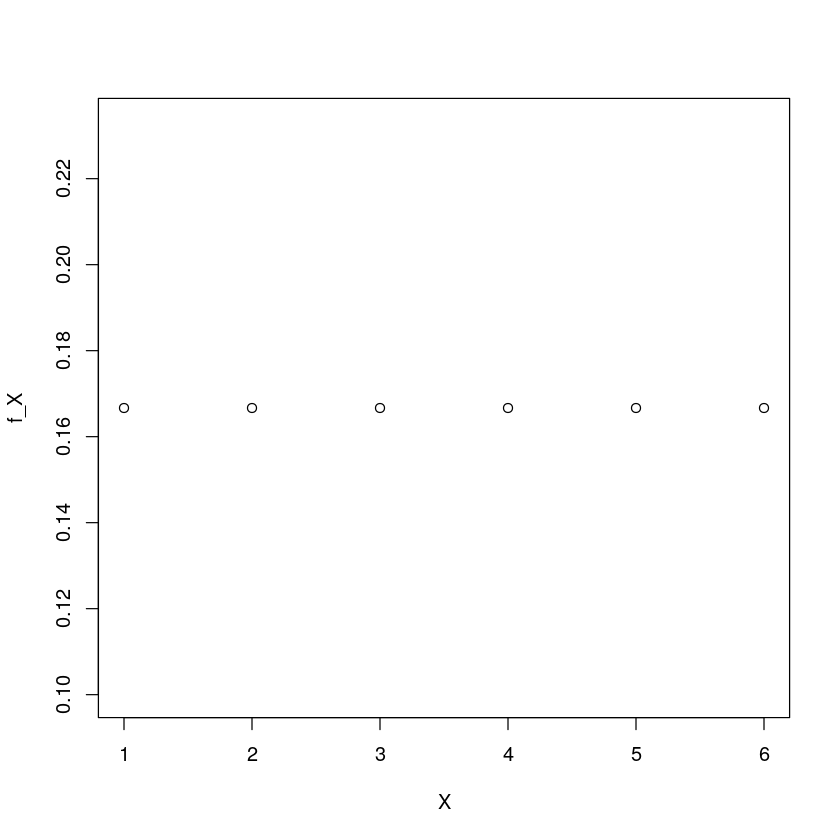

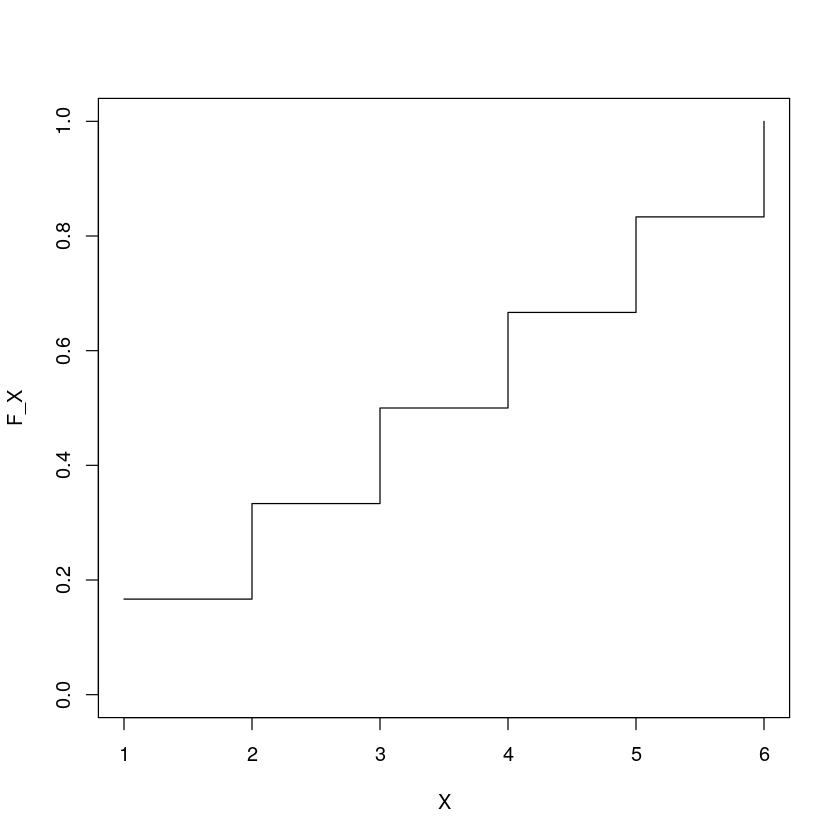

In [4]:
plot(x=1:6, y=pmf_dunif(1:6, min=1, max=6), ylab="f_X", xlab="X")
plot(x=1:6, y=cdf_dunif(1:6, min=1, max=6), type="s", ylab="F_X", xlab="X", ylim=c(0,1))

### Bernoulli distribution

A _Bernoulli trial_ is an experiment that has two outcomes. The sample space is $S=\{success, fail\}$ or $S=\{1, 0\}$.

If $X$ is a random variable following a Bernoulli distribution, then

$P(X=1)=p$ and $P(X=0)=1-p$

A classical example of a Bernoulli experiment is a single toss of a coin. The coin might come up heads with a probability $p$ and tails with a probability $1-p$.

The experiment is called _fair_ if $p=0.5$.

The expected value of a Bernoulli random variable $X$ is

$E[X]=1 \times p + 0 \times (1-p) = p$

The variance of a Bernoulli random variable $X$ is

$Var[X] = E[(X-E[X])^2] = (1-p)^2 \times p + (0-p)^2 \times (1-p) = p(1-p)$ 

In [ ]:
# pmf: Bernoulli trial
plot(x=0:1, y=dbinom(x=0:1, size=1, prob=0.5), ylab="f_X", xlab="X")

In [ ]:
# expected value and variance (with a numerical approach)
samples = rbinom(n=1e5, size=1, prob=0.5)
mean(samples)
var(samples)

### Binomial distribution

The probability of obtaining $k$ successes out of $n$ Bernoulli trials is

$P(Y=k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k} $

The random variable $Y$ follows a _Binomial distribution_ with parameters $n$ and $p$, denoted by $B(n,p)$.

$E[Y]=np$

$Var[Y]=np(1-p)$

The variance is a measure of spread and it increases with $n$ and decreases as $p$ approaches $0$ or $1$. For a given $n$, the variance is maximised when $p=0.5$.

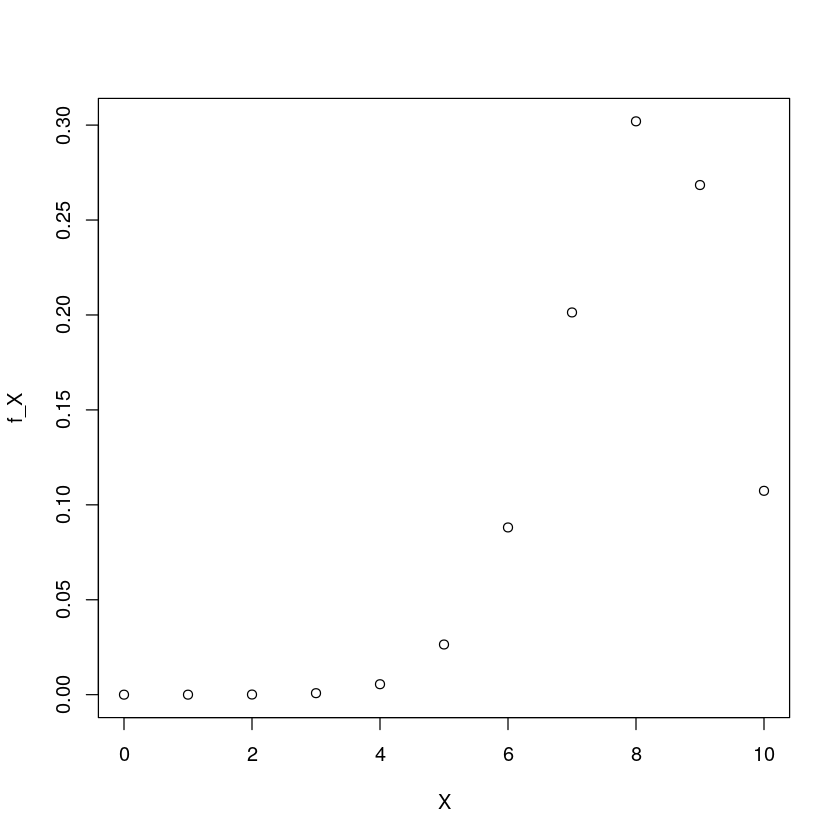

In [11]:
# pmf: Binomial distribution
plot(x=0:10, y=dbinom(x=0:10, size=10, prob=0.8), ylab="f_X", xlab="X")

### Exponential distribution

If $X$ is an exponential random variable then its density function is given by

$f_X(x) = \lambda e^{-\lambda x}$ if $x \geq 0$ or $0$ otherwise.

$E[X] = 1 / \lambda$

$Var[X] = 1 / \lambda^2$

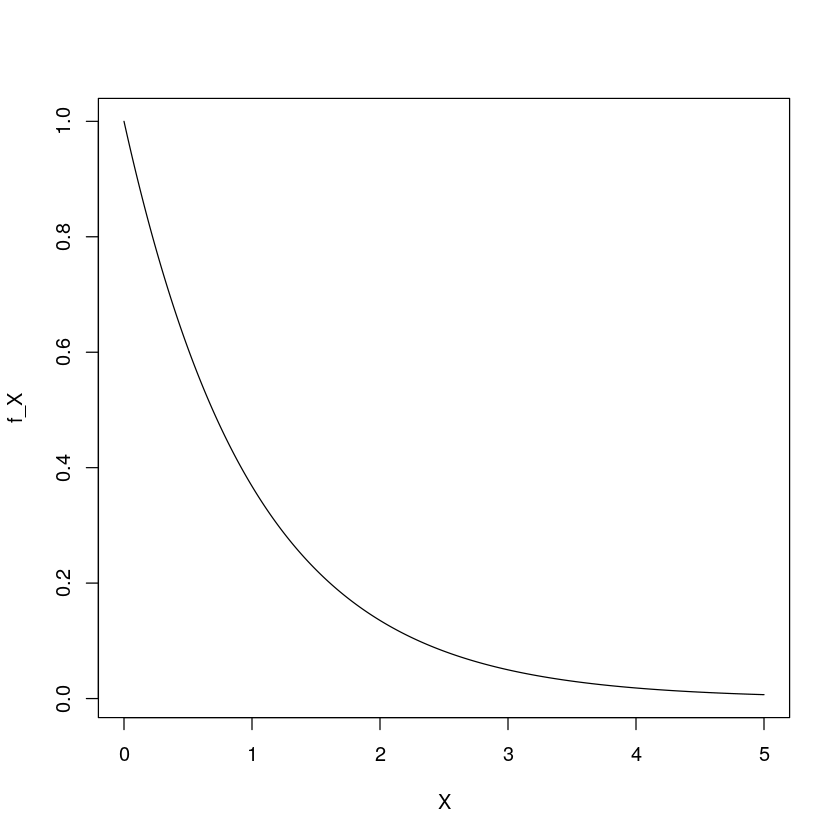

In [18]:
# pdf: Exponential distribution
x = seq(0,5,0.001)
plot(x=x, y=dexp(x=x, rate=1), type="l", ylab="f_X", xlab="X")

### Normal distribution

The probability density function of a Normal (or Gaussian) random variable is 

$f_X(x) = \frac{1}{\sqrt{2\pi\sigma}} e^{-{\frac{(x-\mu)^2}{2\sigma^2}}} $

which depends on a location parameter $\mu$ and a scale parameter $\sigma$.

If $X \sim N(\mu, \sigma^2)$, then

$E[X]=\mu$

$Var[X]=\sigma^2$

This distribution is symmetric with a bell shape. Points of inflection are at $\mu - \sigma$ and $\mu + \sigma$. The mean $\mu$ is also the median and mode.

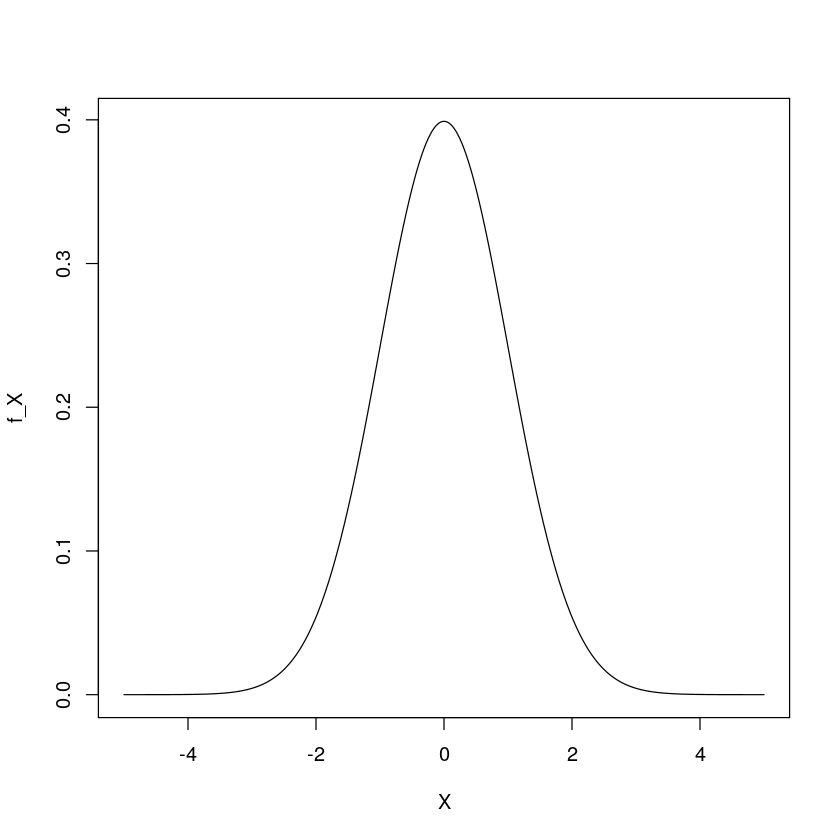

In [27]:
# pdf: Normal distribution
x = seq(-5,5,0.001)
plot(x=x, y=dnorm(x=x, mean=0, sd=1), type="l", ylab="f_X", xlab="X")

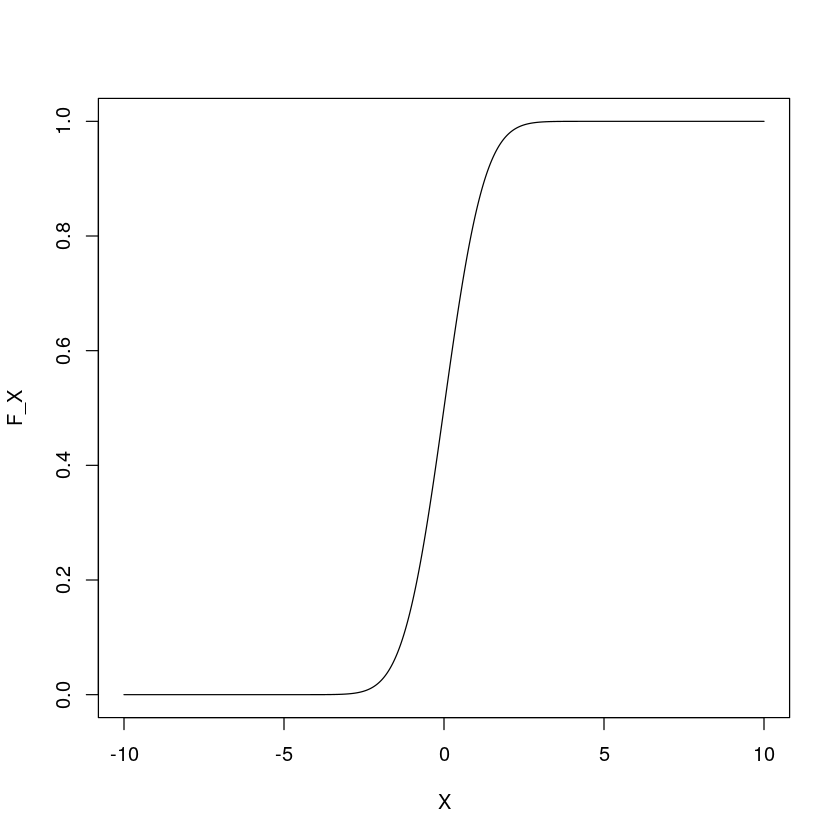

In [26]:
# cdf: Normal distribution
x = seq(-10,10,0.01)
plot(x=x, y=pnorm(q=x, mean=0, sd=1), type="l", ylab="F_X", xlab="X")

There are several rules for manipulating expected values and variances.
* If $X$ is a continuous random variable with pdf $f_X(x)$, then for any real-valued function $g$
\begin{equation*}
E[g(X)] = \int_{-\infty}^{\infty} g(x) f_X(x) dx
\end{equation*}
* If $a$ and $b$ are constants, $E[aX+b]=aE[X]+b$ and $Var[aX+b]=a^2Var[X]$

In [ ]:
# N(mean=1,sd=1)
mu=1; scale=1
a=2; b=3
mean(a*rnorm(n=1e5, mean=mu, sd=scale)+b)
a*1+b

In [ ]:
# N(mean=1,sd=1)
mu=1; scale=1
a=2; b=3
var(a*rnorm(n=1e5, mean=mu, sd=scale)+b)
a^2*1^2

### Intended Learning Outcomes 

At the end of this session, you are now be able to:
* Describe the principles of set theory and set operations
* Illustrate the axiomatic foundations of probability theory and appropriate counting methods
* Identify dependence and indepedence of events
* Show the utility of distribution functions for random variables
* Demonstrate how to implement basic probability calculus in _*R*_